In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Branch_name").getOrCreate()

In [3]:
query= "(SELECT a.BRANCH_CODE, b.transaction_type, round(SUM(b.transaction_value), 2) `total_transaction` \
        FROM cdw_sapp_branch a INNER JOIN \
        cdw_sapp_credit_card b WHERE a.branch_code = b.branch_code and \
        b.TRANSACTION_TYPE = 'Healthcare' group BY a.branch_code \
        ORDER BY  total_transaction DESC LIMIT 2) as bank_high"

sdf_branch = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_branch.show()

+-----------+----------------+-----------------+
|BRANCH_CODE|transaction_type|total_transaction|
+-----------+----------------+-----------------+
|         25|      Healthcare|4370.179999999999|
|         60|      Healthcare|          4072.04|
+-----------+----------------+-----------------+



In [6]:
#Convert spark dataframe to pandas dataframe
pdf_branch = sdf_branch.toPandas()
pdf_branch.set_index(['BRANCH_CODE', 'transaction_type'], inplace = True)

pdf_branch

,,total_transaction
BRANCH_CODE,transaction_type,
25,Healthcare,4370.18
60,Healthcare,4072.04


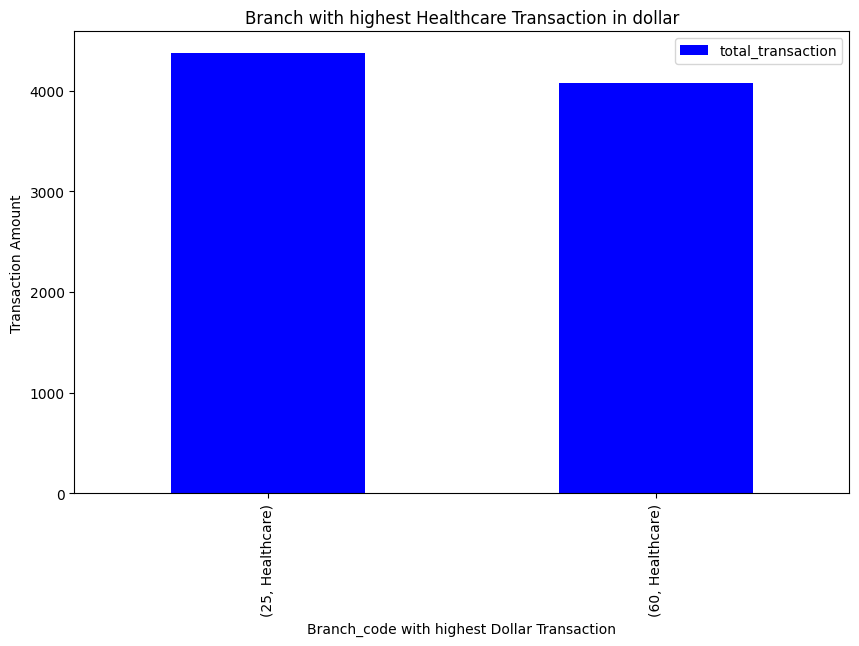

In [7]:
pdf_branch.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Branch_code with highest Dollar Transaction')
plt.ylabel('Transaction Amount')
plt.title('Branch with highest Healthcare Transaction in dollar')
plt.show()